In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
!ls ../../Data

bird_dataset.csv   breeding_range.csv


In [3]:
df1 = pd.read_csv('../../Data/bird_dataset.csv', index_col=0)
df2 = pd.read_csv('../../Data/breeding_range.csv', index_col=0)

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df1.head()

,SpecID,PassNonPass,IOCOrder,BLFamilyLatin,BLFamilyEnglish,BLFamSequID,Taxo,Scientific,English,Diet-Inv,...,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,37.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea americana,Greater Rhea,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38.0,Nonpasseriformes,Rheiformes,Rheidae,Rheas,3.0,BL3,Rhea pennata,Lesser Rhea,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius casuarius,Southern Cassowary,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius bennetti,Dwarf Cassowary,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,47.0,Nonpasseriformes,Casuariiformes,Casuariidae,Cassowaries,4.0,BL3,Casuarius unappendiculatus,Northern Cassowary,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

In [6]:
data1 = [df1['africa'], df1['antarctica'], df1['asia'], df1['australasia'], df1['caribbean'], df1['central_amer'],
       df1['central_asia'], df1['europe'], df1['high_seas'], df1['mid_east'], df1['north_amer'], df1['oceania'], 
       df1['south_amer']]

In [7]:
regions = pd.concat(data1, axis=1)

In [8]:
regions

,africa,antarctica,asia,australasia,caribbean,central_amer,central_asia,europe,high_seas,mid_east,north_amer,oceania,south_amer
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data2 = [df1['agriculture_threat'], df1['biological_threat'], df1['climate_change_threat'], 
         df1['energy_mining_threat'], df1['geological_threat'], df1['human_intrusions_threat'],
       df1['natural_systems_threat'], df1['pollution_threat'], df1['res_comm_dev_threat'], 
         df1['transportation_threat'], df1['invasive_threat']]

In [10]:
threats = pd.concat(data2, axis=1)

In [11]:
threats

,agriculture_threat,biological_threat,climate_change_threat,energy_mining_threat,geological_threat,human_intrusions_threat,natural_systems_threat,pollution_threat,res_comm_dev_threat,transportation_threat,invasive_threat
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9953,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9973,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df1['Global IUCN Red List Category'].value_counts()
# IUCN classifies these categories as "threatened"
# EX - Extinct
# EW - Extinct in the Wild
# CR(PE) - Critically Endangered Possibly Extinct
# CR - Critically Endangered
# EN - Endangered
# VU - Vulnerable

# IUCN classifies these categories as "not threatened"
# NT - Near Threatened
# LC - Least Concern
# DD - Data Deficient

LC        7448
NT         859
VU         685
EN         376
CR         167
DD          41
CR(PE)      11
EX           5
EW           5
Name: Global IUCN Red List Category, dtype: int64

In [13]:
df1['threatened'] = [0.0 if x in ['NT', 'LC', 'DD'] else 1.0 for x in df1['Global IUCN Red List Category']]

In [14]:
# 0.0 = not threatened (8348)
# 1.0 = threatened (1249)
df1['threatened'].value_counts()

# Definitely imbalanced in favor of "not threatened"

0.0    8348
1.0    1249
Name: threatened, dtype: int64

In [15]:
X_train_regions, X_test_regions, y_train_regions, y_test_regions = train_test_split(regions, df1['threatened'], test_size=.25, random_state=42)

In [16]:
# Using class_weight = 'balanced' to help with class imbalance
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_regions, y_train_regions)

LogisticRegression(class_weight='balanced', random_state=42)

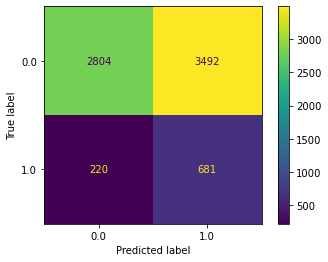

In [17]:
plot_confusion_matrix(model, X_train_regions, y_train_regions);

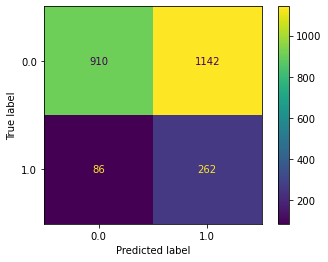

In [18]:
plot_confusion_matrix(model, X_test_regions, y_test_regions);

In [19]:
cv_scores = cross_val_score(model, X_train_regions, y_train_regions, cv=5)
np.median(cv_scores)

0.47708333333333336

In [20]:
region_preds = model.predict(X_test_regions)

In [21]:
"""
acc = (tp + tn) / (tp + tn + fp + fn)
acc = (0 + 2052) / (0 + 2052 + 0 + 348)
acc = 2052/2400
acc = .855
"""
accuracy_score(y_test_regions, region_preds)

0.48833333333333334

In [22]:
"""
prec = tp / (tp + fp)
prec = 0 / (0 + 0)
prec = 0 / 0
prec = Error
"""
precision_score(y_test_regions, region_preds)

0.1866096866096866

In [23]:
"""
rec = tp / (tp + fn)
rec = 0 / (0 + 348)
rec = 0 / 348
rec = 0
"""
recall_score(y_test_regions, region_preds)

0.7528735632183908

In [24]:
f1_score(y_test_regions, region_preds)

0.2990867579908676

AUC Score: 0.637081008715915


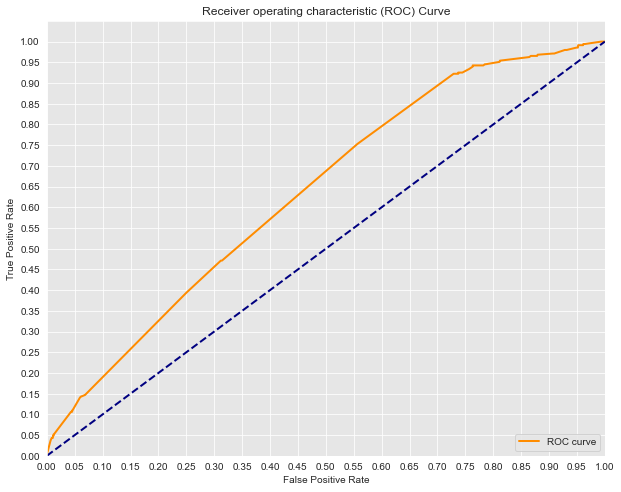

In [25]:
y_score = model.decision_function(X_test_regions)

fpr, tpr, thresholds = roc_curve(y_test_regions, y_score)

print("AUC Score:",auc(fpr, tpr))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [26]:
X_train_threats, X_test_threats, y_train_threats, y_test_threats = train_test_split(threats, df1['threatened'], test_size=.25, random_state=42)

In [27]:
model2 = LogisticRegression(random_state=42, class_weight='balanced')
model2.fit(X_train_threats, y_train_threats)

LogisticRegression(class_weight='balanced', random_state=42)

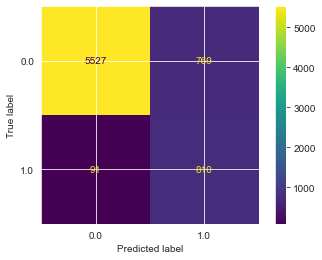

In [28]:
plot_confusion_matrix(model2, X_train_threats, y_train_threats);

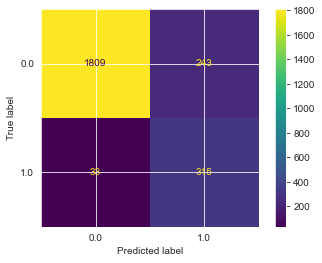

In [29]:
plot_confusion_matrix(model2, X_test_threats, y_test_threats);

In [30]:
cv_scores = cross_val_score(model2, X_train_threats, y_train_threats, cv=5)
np.median(cv_scores)

0.8819444444444444

In [31]:
threat_preds = model2.predict(X_test_threats)

In [32]:
accuracy_score(y_test_threats, threat_preds)

0.885

In [33]:
precision_score(y_test_threats, threat_preds)

0.5645161290322581

In [34]:
recall_score(y_test_threats, threat_preds)

0.9051724137931034

In [35]:
f1_score(y_test_threats, threat_preds)

0.695364238410596

AUC Score: 0.9449093679281216


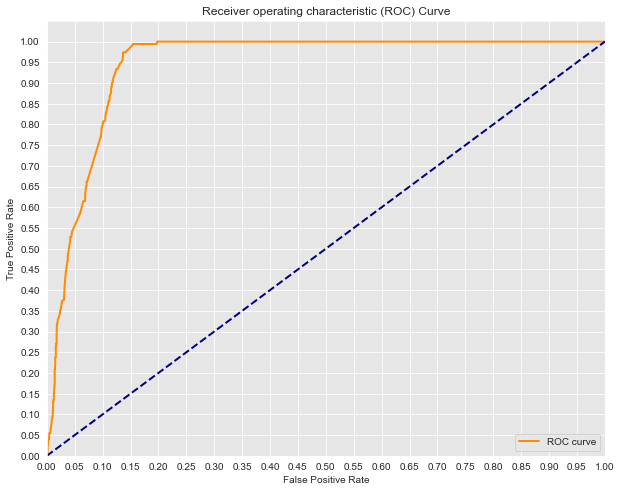

In [36]:
y_score = model2.decision_function(X_test_threats)

fpr, tpr, thresholds = roc_curve(y_test_threats, y_score)

print("AUC Score:",auc(fpr, tpr))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [37]:
data3 = [df1['Diet-Inv'], df1['Diet-Vend'], df1['Diet-Vect'], df1['Diet-Vfish'], df1['Diet-Vunk'], 
         df1['Diet-Scav'], df1['Diet-Fruit'], df1['Diet-Nect'], df1['Diet-Seed'], df1['Diet-PlantO']]

In [38]:
diets = pd.concat(data3, axis=1)

In [39]:
# Time to scale...
diets

,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,Diet-Seed,Diet-PlantO
1,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,20.0,20.0
2,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,30.0,40.0
3,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0
4,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,0.0,0.0
5,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...
9953,90.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
9973,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0
9977,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0
9981,40.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,30.0,10.0


In [40]:
X_train_diets, X_test_diets, y_train_diets, y_test_diets = train_test_split(diets, df1['threatened'], test_size=.25, random_state=42)

In [41]:
# Scaling data
# Divide by 100
# scaler = StandardScaler()
X_train_diets_scaled = X_train_diets/100
X_test_diets_scaled = X_test_diets/100

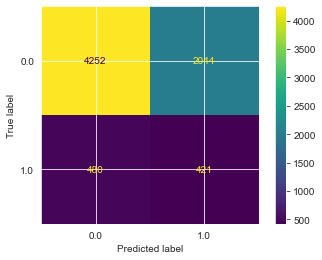

In [42]:
model3 = LogisticRegression(random_state=42, class_weight='balanced')
model3.fit(X_train_diets_scaled, y_train_diets)
plot_confusion_matrix(model3, X_train_diets_scaled, y_train_diets);

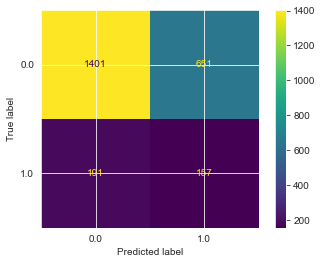

In [43]:
plot_confusion_matrix(model3, X_test_diets_scaled, y_test_diets);

In [44]:
cv_scores = cross_val_score(model3, X_train_diets_scaled, y_train_diets, cv=5)
np.median(cv_scores)

0.6486111111111111

In [45]:
diet_preds = model3.predict(X_test_diets_scaled)

In [46]:
accuracy_score(y_test_diets, diet_preds)

0.6491666666666667

In [47]:
precision_score(y_test_diets, diet_preds)

0.1943069306930693

In [48]:
recall_score(y_test_diets, diet_preds)

0.4511494252873563

In [49]:
f1_score(y_test_diets, diet_preds)

0.27162629757785467

AUC Score: 0.5818636429835764


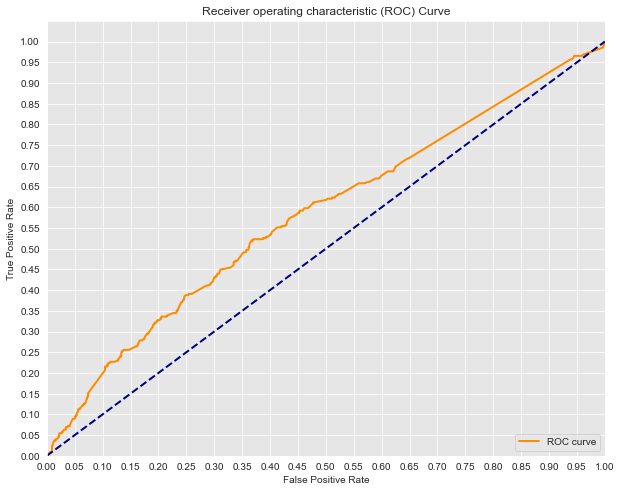

In [50]:
y_score = model3.decision_function(X_test_diets_scaled)

fpr, tpr, thresholds = roc_curve(y_test_diets, y_score)

print("AUC Score:",auc(fpr, tpr))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [51]:
# Previous original class distribution
print('Original class distribution: \n')
print(df1['threatened'].value_counts())
smote = SMOTE()
X_train_regions_resampled, y_train_regions_resampled = smote.fit_sample(X_train_regions, y_train_regions) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_regions_resampled).value_counts()) 

Original class distribution: 

0.0    8348
1.0    1249
Name: threatened, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1.0    6296
0.0    6296
Name: threatened, dtype: int64


In [52]:
sm_model = LogisticRegression(random_state=42)
sm_model.fit(X_train_regions_resampled, y_train_regions_resampled)

LogisticRegression(random_state=42)

In [53]:
cv_scores = cross_val_score(sm_model, X_train_regions_resampled, y_train_regions_resampled, cv=5)
np.median(cv_scores)

0.6056393963463066

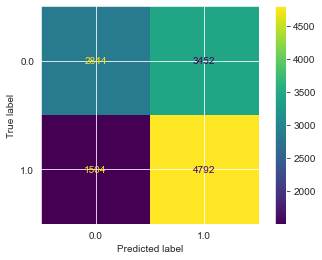

In [54]:
plot_confusion_matrix(sm_model, X_train_regions_resampled, y_train_regions_resampled);

AUC Score: 0.6374311017006117


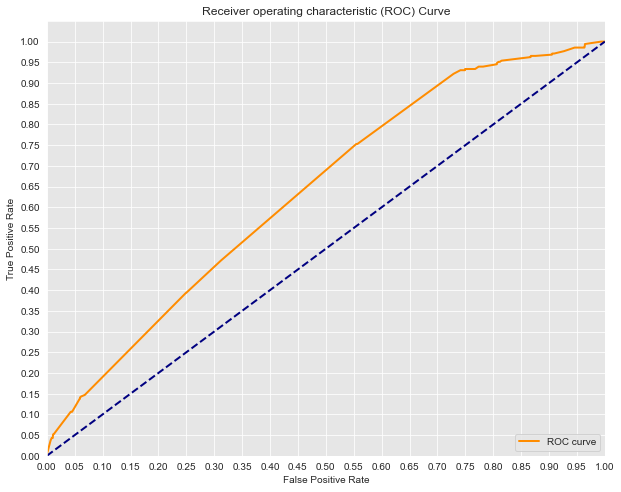

In [55]:
y_score = sm_model.decision_function(X_test_regions)

fpr, tpr, thresholds = roc_curve(y_test_regions, y_score)

print("AUC Score:",auc(fpr, tpr))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [56]:
terrain = df1[df1.columns[70:85]]

In [57]:
X_train_terr, X_test_terr, y_train_terr, y_test_terr = train_test_split(terrain, df1['threatened'], test_size=.25, random_state=42)

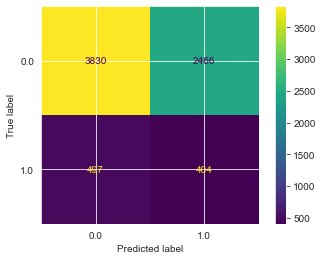

In [58]:
model4 = LogisticRegression(random_state=42, class_weight='balanced')
model4.fit(X_train_terr, y_train_terr)
plot_confusion_matrix(model4, X_train_terr, y_train_terr);

In [59]:
cv_scores = cross_val_score(model4, X_train_terr, y_train_terr, cv=5)
np.median(cv_scores)

0.5802640722724114

In [60]:
terr_preds = model4.predict(X_test_terr)

In [61]:
accuracy_score(y_test_terr, terr_preds)

0.5758333333333333

In [62]:
precision_score(y_test_terr, terr_preds)

0.14736842105263157

In [63]:
recall_score(y_test_terr, terr_preds)

0.40229885057471265

In [64]:
f1_score(y_test_terr, terr_preds)

0.21571648690292758

AUC Score: 0.4888901492236338


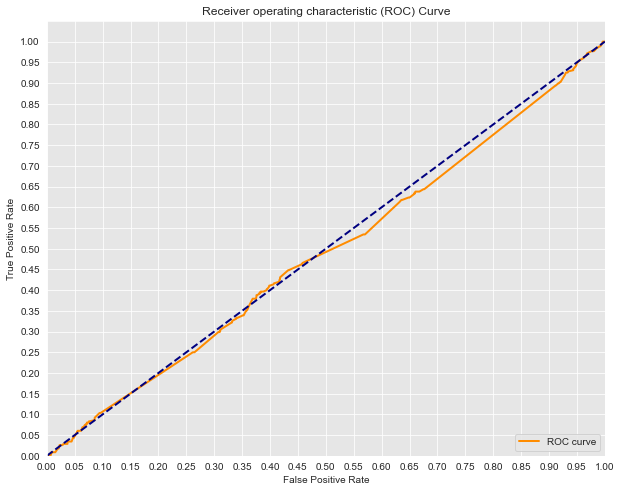

In [65]:
y_score = model4.decision_function(X_test_terr)

fpr, tpr, thresholds = roc_curve(y_test_terr, y_score)

print("AUC Score:",auc(fpr, tpr))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

In [66]:
# Regions data KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_regions, y_train_regions)
regions_test_preds = clf.predict(X_test_regions)
print("Accuracy Score: ",accuracy_score(y_test_regions, regions_test_preds))
print("Precision Score:",precision_score(y_test_regions, regions_test_preds))
print("Recall Score:   ",recall_score(y_test_regions, regions_test_preds))
print("F1 Score:       ",f1_score(y_test_regions, regions_test_preds))

Accuracy Score:  0.7304166666666667
Precision Score: 0.20040080160320642
Recall Score:    0.28735632183908044
F1 Score:        0.2361275088547816


In [67]:
# Regions data KNN (w/ SMOTE)
clfrs = KNeighborsClassifier(n_neighbors=5)
clfrs.fit(X_train_regions_resampled, y_train_regions_resampled)
regions_test_predsrs = clfrs.predict(X_test_regions)
print("Accuracy Score: ",accuracy_score(y_test_regions, regions_test_predsrs))
print("Precision Score:",precision_score(y_test_regions, regions_test_predsrs))
print("Recall Score:   ",recall_score(y_test_regions, regions_test_predsrs))
print("F1 Score:       ",f1_score(y_test_regions, regions_test_predsrs))

Accuracy Score:  0.8504166666666667
Precision Score: 0.36585365853658536
Recall Score:    0.04310344827586207
F1 Score:        0.07712082262210797


In [68]:
# Threats data KNN
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train_threats, y_train_threats)
threats_test_preds = clf2.predict(X_test_threats)
print("Accuracy Score: ",accuracy_score(y_test_threats, threats_test_preds))
print("Precision Score:",precision_score(y_test_threats, threats_test_preds))
print("Recall Score:   ",recall_score(y_test_threats, threats_test_preds))
print("F1 Score:       ",f1_score(y_test_threats, threats_test_preds))

Accuracy Score:  0.8820833333333333
Precision Score: 0.6173285198555957
Recall Score:    0.49137931034482757
F1 Score:        0.5472


In [69]:
# Diets data KNN
clf3 = KNeighborsClassifier(n_neighbors=1)
clf3.fit(X_train_diets_scaled, y_train_diets)
diets_test_preds = clf3.predict(X_test_diets_scaled)
print("Accuracy Score: ",accuracy_score(y_test_diets, diets_test_preds))
print("Precision Score:",precision_score(y_test_diets, diets_test_preds))
print("Recall Score:   ",recall_score(y_test_diets, diets_test_preds))
print("F1 Score:       ",f1_score(y_test_diets, diets_test_preds))

Accuracy Score:  0.7895833333333333
Precision Score: 0.21660649819494585
Recall Score:    0.1724137931034483
F1 Score:        0.19200000000000003


In [70]:
# Terrain data KNN
clf4 = KNeighborsClassifier(n_neighbors=1)
clf4.fit(X_train_terr, y_train_terr)
terr_test_preds = clf4.predict(X_test_terr)
print("Accuracy Score: ",accuracy_score(y_test_terr, terr_test_preds))
print("Precision Score:",precision_score(y_test_terr, terr_test_preds))
print("Recall Score:   ",recall_score(y_test_terr, terr_test_preds))
print("F1 Score:       ",f1_score(y_test_terr, terr_test_preds))

Accuracy Score:  0.8125
Precision Score: 0.16447368421052633
Recall Score:    0.07183908045977011
F1 Score:        0.1


In [71]:
# Regions data DT
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train_regions, y_train_regions)
region_preds_dt = dt.predict(X_test_regions)
print("Accuracy Score: ",accuracy_score(y_test_regions, region_preds_dt))
print("Precision Score:",precision_score(y_test_regions, region_preds_dt))
print("Recall Score:   ",recall_score(y_test_regions, region_preds_dt))
print("F1 Score:       ",f1_score(y_test_regions, region_preds_dt))

Accuracy Score:  0.85625
Precision Score: 0.8
Recall Score:    0.011494252873563218
F1 Score:        0.022662889518413595


In [72]:
# Regions data DT (w/SMOTE)
dtrs = DecisionTreeClassifier(criterion='entropy')
dtrs.fit(X_train_regions_resampled, y_train_regions_resampled)
region_preds_dtrs = dtrs.predict(X_test_regions)
print("Accuracy Score: ",accuracy_score(y_test_regions, region_preds_dtrs))
print("Precision Score:",precision_score(y_test_regions, region_preds_dtrs))
print("Recall Score:   ",recall_score(y_test_regions, region_preds_dtrs))
print("F1 Score:       ",f1_score(y_test_regions, region_preds_dtrs))

Accuracy Score:  0.48875
Precision Score: 0.18539727988546886
Recall Score:    0.7442528735632183
F1 Score:        0.2968481375358166


In [73]:
# Threats data DT
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt2.fit(X_train_threats, y_train_threats)
threat_preds_dt = dt2.predict(X_test_threats)
print("Accuracy Score: ",accuracy_score(y_test_threats, threat_preds_dt))
print("Precision Score:",precision_score(y_test_threats, threat_preds_dt))
print("Recall Score:   ",recall_score(y_test_threats, threat_preds_dt))
print("F1 Score:       ",f1_score(y_test_threats, threat_preds_dt))

Accuracy Score:  0.8870833333333333
Precision Score: 0.6313993174061433
Recall Score:    0.5316091954022989
F1 Score:        0.577223088923557


In [74]:
# Diets data DT
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt3.fit(X_train_diets_scaled, y_train_diets)
diet_preds_dt = dt3.predict(X_test_diets_scaled)
print("Accuracy Score: ",accuracy_score(y_test_diets, diet_preds_dt))
print("Precision Score:",precision_score(y_test_diets, diet_preds_dt))
print("Recall Score:   ",recall_score(y_test_diets, diet_preds_dt))
print("F1 Score:       ",f1_score(y_test_diets, diet_preds_dt))

Accuracy Score:  0.85625
Precision Score: 0.8
Recall Score:    0.011494252873563218
F1 Score:        0.022662889518413595


In [75]:
# Terrain data DT
dt4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt4.fit(X_train_terr, y_train_terr)
terr_preds_dt = dt4.predict(X_test_terr)
print("Accuracy Score: ",accuracy_score(y_test_terr, terr_preds_dt))
print("Precision Score:",precision_score(y_test_terr, terr_preds_dt))
print("Recall Score:   ",recall_score(y_test_terr, terr_preds_dt))
print("F1 Score:       ",f1_score(y_test_terr, terr_preds_dt))

Accuracy Score:  0.855
Precision Score: 0.0
Recall Score:    0.0
F1 Score:        0.0


/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
for col in df1:
    if df1[col].isna().any():
        print(col)

Diet-EnteredBy
BodyMass-Comment
Record-Comment


In [77]:
df1['Diet-EnteredBy'].isna().sum()

272

In [78]:
df1['BodyMass-Comment'].isna().sum()

9267

In [79]:
df1['Record-Comment'].isna().sum()

9372

In [80]:
df1 = df1.drop(columns=['Diet-EnteredBy', 'BodyMass-Comment', 'Record-Comment'])

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

In [82]:
float_cols = []
for col in df1:
    if df1[col].dtypes=='float64':
        float_cols.append(col)
floats = df1[float_cols].drop(columns=['threatened'])
floats

,SpecID,BLFamSequID,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,Diet-Nect,...,grassland,introduced_vegetation,marine_coastal_supratidal,marine_intertidal,marine_neritic,marine_oceanic,rocky_areas,savanna,shrubland,wetlands_inland
1,37.0,3.0,20.0,10.0,10.0,0.0,0.0,0.0,20.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38.0,3.0,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.0,4.0,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,4.0,10.0,0.0,0.0,0.0,10.0,0.0,80.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,47.0,4.0,20.0,0.0,0.0,0.0,10.0,0.0,60.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,20067.0,163.0,90.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9973,20087.0,183.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9977,20091.0,188.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,20095.0,192.0,40.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df1['threatened']

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
9953    0.0
9973    1.0
9977    0.0
9981    1.0
9985    1.0
Name: threatened, Length: 9597, dtype: float64

In [84]:
obj_cols = []
for col in df1:
    if df1[col].dtypes=='object':
        obj_cols.append(col)
len(obj_cols)

16

In [85]:
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(floats, df1['threatened'], test_size=.25, random_state=42)

In [86]:
# Big model for some reason
model_big = LogisticRegression(max_iter=10000)
model_big.fit(X_train_big, y_train_big)

LogisticRegression(max_iter=10000)

In [87]:
cv_scores = cross_val_score(model_big, X_train_big, y_train_big, cv=5)
np.median(cv_scores)

0.9082696316886727

In [88]:
# Big Model LogReg
big_preds = model_big.predict(X_test_big)
print("Accuracy Score: ",accuracy_score(y_test_big, big_preds))
print("Precision Score:",precision_score(y_test_big, big_preds))
print("Recall Score:   ",recall_score(y_test_big, big_preds))
print("F1 Score:       ",f1_score(y_test_big, big_preds))

Accuracy Score:  0.8983333333333333
Precision Score: 0.7
Recall Score:    0.5229885057471264
F1 Score:        0.5986842105263157


In [89]:
# Big Model KNN
clf_big = KNeighborsClassifier(n_neighbors=1)
clf_big.fit(X_train_big, y_train_big)
big_knn_preds = clf_big.predict(X_test_big)
print("Accuracy Score: ",accuracy_score(y_test_big, big_knn_preds))
print("Precision Score:",precision_score(y_test_big, big_knn_preds))
print("Recall Score:   ",recall_score(y_test_big, big_knn_preds))
print("F1 Score:       ",f1_score(y_test_big, big_knn_preds))

Accuracy Score:  0.80125
Precision Score: 0.2912621359223301
Recall Score:    0.25862068965517243
F1 Score:        0.273972602739726


In [90]:
# Big Model DT
dt_big = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dt_big.fit(X_train_big, y_train_big)
big_dt_preds = dt_big.predict(X_test_big)
print("Accuracy Score: ",accuracy_score(y_test_big, big_dt_preds))
print("Precision Score:",precision_score(y_test_big, big_dt_preds))
print("Recall Score:   ",recall_score(y_test_big, big_dt_preds))
print("F1 Score:       ",f1_score(y_test_big, big_dt_preds))

Accuracy Score:  0.90125
Precision Score: 0.6581196581196581
Recall Score:    0.6637931034482759
F1 Score:        0.6609442060085837


In [93]:
floats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SpecID                     9597 non-null   float64
 1   BLFamSequID                9597 non-null   float64
 2   Diet-Inv                   9597 non-null   float64
 3   Diet-Vend                  9597 non-null   float64
 4   Diet-Vect                  9597 non-null   float64
 5   Diet-Vfish                 9597 non-null   float64
 6   Diet-Vunk                  9597 non-null   float64
 7   Diet-Scav                  9597 non-null   float64
 8   Diet-Fruit                 9597 non-null   float64
 9   Diet-Nect                  9597 non-null   float64
 10  Diet-Seed                  9597 non-null   float64
 11  Diet-PlantO                9597 non-null   float64
 12  ForStrat-watbelowsurf      9597 non-null   float64
 13  ForStrat-wataroundsurf     9597 non-null   float

In [101]:
# 'SpecID', 'BLFamSequID', 'Unnamed: 0.1'
floats[].value_counts()

7482.0     2
10741.0    2
2819.0     2
2781.0     2
2682.0     2
          ..
2897.0     1
567.0      1
5812.0     1
581.0      1
2.0        1
Name: Unnamed: 0.1, Length: 9575, dtype: int64